In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import glob

In [134]:
def findMaxContour_adaptiveThredhold(img):
    img = cv2.pyrMeanShiftFiltering(img, 16, 16)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)

    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,11,2)
    
    _, contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours.sort(key=cv2.contourArea, reverse=True)
    return contours[0]


def findMaxContour(img):
    
    img = cv2.pyrMeanShiftFiltering(img, 16, 16)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(gray,(5,5),0)

    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#     thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,5,2)
#     _, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY)
    
    _, contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours.sort(key=cv2.contourArea, reverse=True)
    return contours[0]


def get_top(img):
    cnt = findMaxContour(img)

    cv2.drawContours(img, [cnt], 0, (0,255,0), 1)
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    ext_cnt = cnt[np.where((cnt[:,:,1]<cy) & (cnt[:,:,0]>cx-20) & (cnt[:,:,0]<cx+20))[0]] 
    top = tuple(ext_cnt[ext_cnt[:,:, 1].argmax()])[0]
    x, y = top
    
    return x, y+2


def grabcut(img, num, rect):
#     img = cv2.GaussianBlur(img,(5,5),0)
    h, w = img.shape[:2]
    cx, cy = w//2, h//2
    
    mask = np.zeros(img.shape[:2], np.uint8) # マスク用領域
    bgModel = np.zeros((1, 65), np.float64) # 背景GMMモデル
    fgModel = np.zeros((1, 65), np.float64) # 前景GMMモデル
    
    cv2.grabCut(img, mask, rect, bgModel, fgModel, num, cv2.GC_INIT_WITH_RECT) # イテレーション回数5
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8) # maskの値が1の部分のみ残して0クリア
    img = cv2.bitwise_and(img, img, mask=mask2)
    
    img = cv2.flip(img,0)
    
    cv2.grabCut(img, mask, rect, bgModel, fgModel, num, cv2.GC_INIT_WITH_RECT) # イテレーション回数5
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8) # maskの値が1の部分のみ残して0クリア
    img = cv2.bitwise_and(img, img, mask=mask2)
    
    return cv2.flip(img,0)



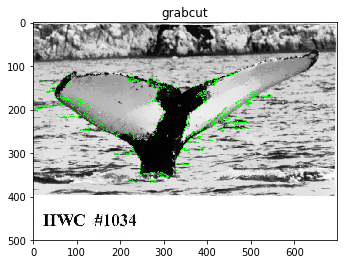

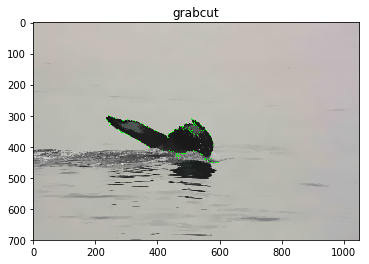

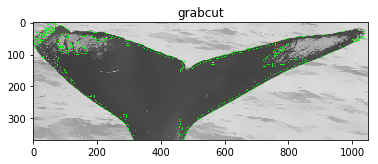

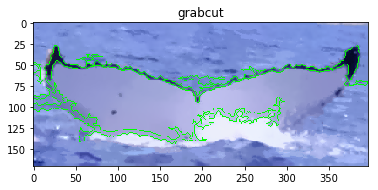

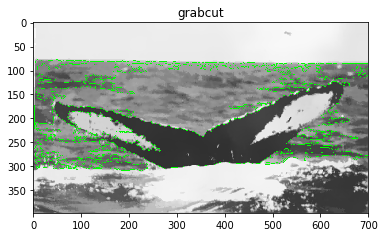

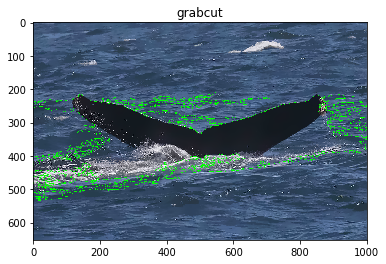

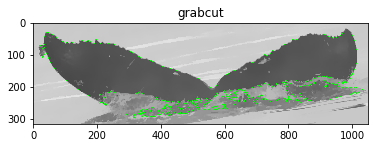

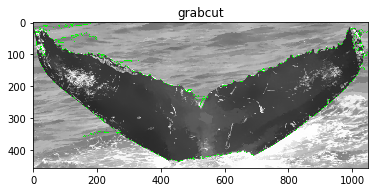

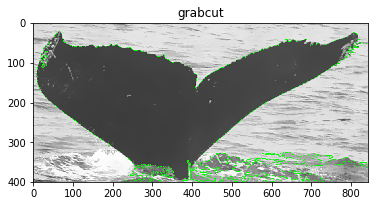

In [ ]:
path = 'whale_recognition/train/'

for file in glob.glob(path+'*.???')[:10]:
    
    img = cv2.imread(file)
    img = cv2.pyrMeanShiftFiltering(img, 16, 16)

    cnt = findMaxContour_adaptiveThredhold(img)
    cv2.drawContours(img, [cnt], 0, (0,255,0), 1)

    plt.title('grabcut'), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

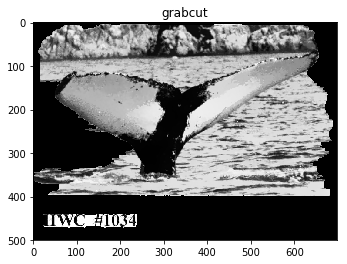

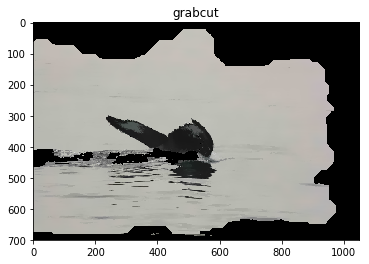

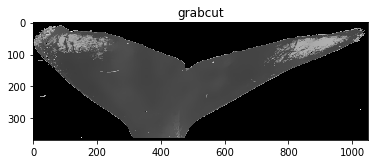

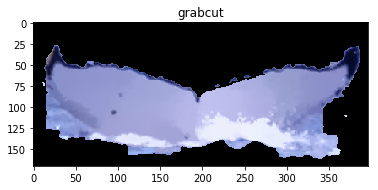

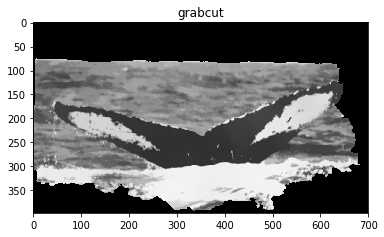

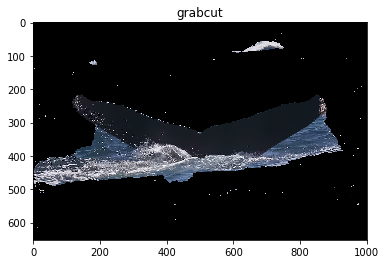

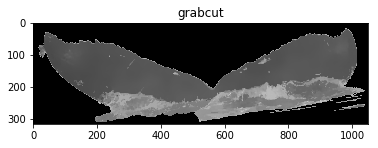

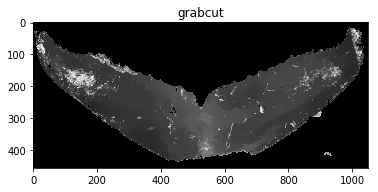

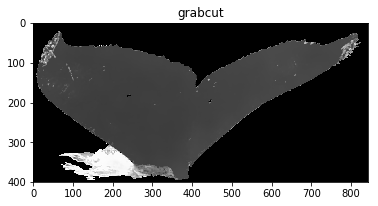

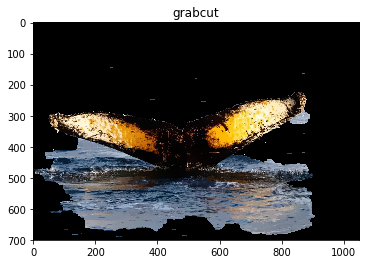

In [32]:
path = 'whale_recognition/train/'

for file in glob.glob(path+'*.???')[:10]:
    
    img = cv2.imread(file)
    img = cv2.pyrMeanShiftFiltering(img, 16, 16)

    img = grabcut(img, 1, (1, 5,img.shape[1]-10, img.shape[0]))

    plt.title('grabcut'), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

# cnt = findMaxContour_adaptiveThredhold(img)
# cv2.drawContours(img, [cnt], 0, (0,255,0), 2)

# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

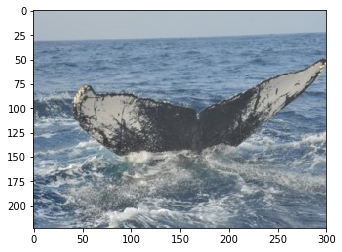

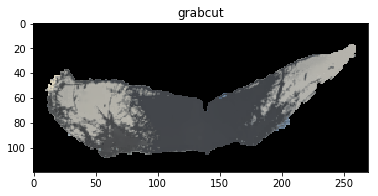

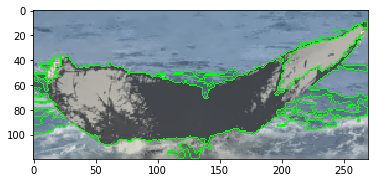

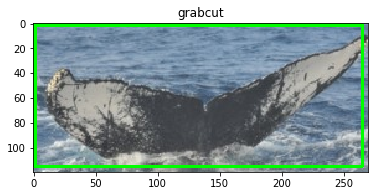

(Text(0.5,1,'grabcut'), <matplotlib.image.AxesImage at 0x1e2629a1a90>, None)

In [8]:
img = cv2.imread('whale/images/G0010765.JPG')
h, w = img.shape[:2]
cx, cy = w//2, h//2
# R = cv2.getRotationMatrix2D((cx, cy), -0, 1)    # 回転変換行列の算出
# img = cv2.warpAffine(img, R, (w,h), flags=cv2.INTER_CUBIC)    # アフィン変換

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

img = img[40:160,30:350]
img = cv2.pyrMeanShiftFiltering(img, 16, 16)

img_copy = img.copy()
img_copy = grabcut(img_copy, 1, (1, 5,img.shape[1]-10, img.shape[0]))

plt.title('grabcut'), plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)),plt.show()

cnt = findMaxContour_adaptiveThredhold(img)
cv2.drawContours(img, [cnt], 0, (0,255,0), 1)

# img = cv2.circle(img,(cx,cy), 3, (255,0,0), -1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()
img = cv2.imread('whale/images/G0010765.JPG')
img = img[40:160,30:350]
cv2.rectangle(img,(1,1),(img.shape[1]-5,img.shape[0]-5),(0,255,0),2)

plt.title('grabcut'), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()


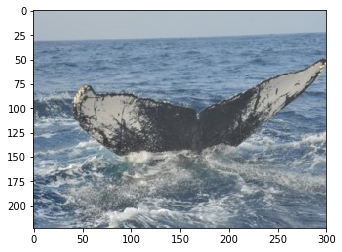

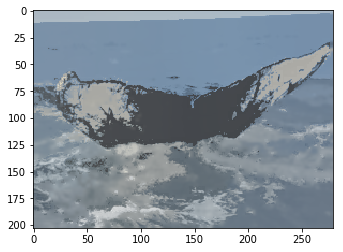

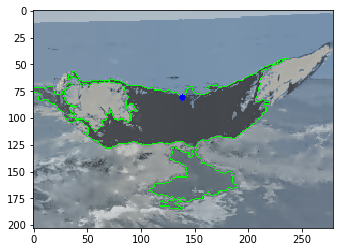

(<matplotlib.image.AxesImage at 0x20a66cca898>, None)

In [107]:
img = cv2.imread('whale/images/G0010765.JPG')
h, w = img.shape[:2]
cx, cy = w//2, h//2
R = cv2.getRotationMatrix2D((cx, cy), -0, 1)    # 回転変換行列の算出
img = cv2.warpAffine(img, R, (w,h), flags=cv2.INTER_CUBIC)    # アフィン変換

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

img = img[20:230,20:300]
img = cv2.pyrMeanShiftFiltering(img, 32, 32)
# plt.hist(img.ravel(),256,[0,256]), plt.show()
# img = grabcut(img,2,(1, 1,img.shape[1]-1, img.shape[0]-1))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()
cx, cy = get_top(img)

img = cv2.circle(img,(cx,cy), 3, (255,0,0), -1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

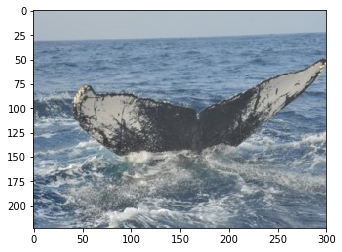

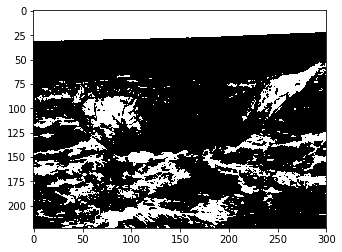

In [7]:
img = cv2.imread('whale/images/G0010765.JPG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

dst = cv2.inRange(img, (150, 150, 150), (255, 255, 255))

plt.imshow(dst, plt.cm.gray)
plt.show()

# 自動で閾値設定(大津の二値化)

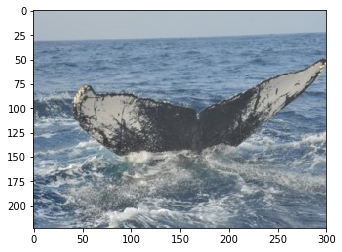

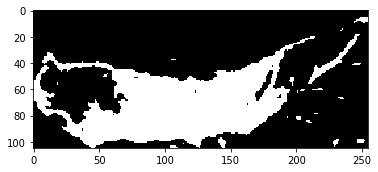

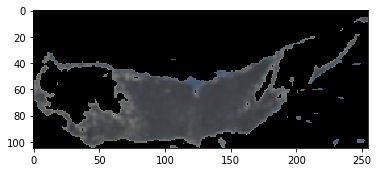

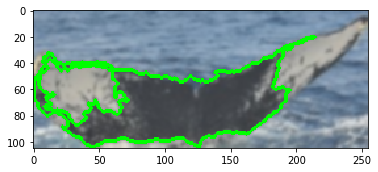

(<matplotlib.image.AxesImage at 0x2406e35fcc0>, None)

In [3]:
img = cv2.imread('whale/images/G0010765.JPG')
cv2.pyrMeanShiftFiltering(img, 32, 32)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

img = img[45:150,45:300]

img = cv2.GaussianBlur(img, (5, 5), 0) # ガウスぼかしを適用

# BGRをHSVに変換
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# HSVに分解
h_img, s_img, v_img = cv2.split(hsv)

# cv2.THRESH_OTSUをフラグに足すと閾値を自動決定。
_, thresh = cv2.threshold(v_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
result = cv2.bitwise_and(img,img, mask= thresh)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)),plt.show()
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)),plt.show()

gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
_, contours, _ = cv2.findContours(gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contours.sort(key=cv2.contourArea, reverse=True)
cnt = contours[0]
img = cv2.drawContours(img, cnt, -1, (0,255,0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

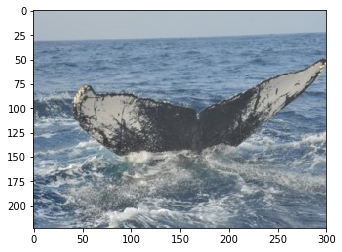

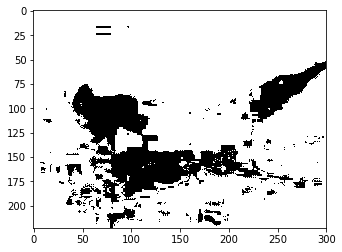

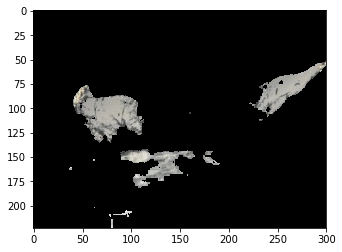

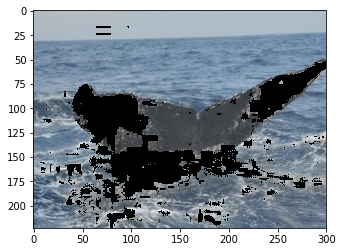

(<matplotlib.image.AxesImage at 0x229ba660ba8>, None)

In [44]:
img = cv2.imread('whale/images/G0010765.JPG')
cv2.pyrMeanShiftFiltering(img, 32, 32)
img_copy = img.copy()
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

# define range of blue color in HSV
lower = np.array([0,0,0])
upper = np.array([50,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower, upper)
img = cv2.bitwise_and(img,img, mask=mask)

# define range of blue color in HSV
lower = np.array([100,0,0])
upper = np.array([255,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower, upper)
img_copy = cv2.bitwise_and(img_copy,img_copy, mask=mask)
plt.imshow(cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)),plt.show()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)),plt.show()

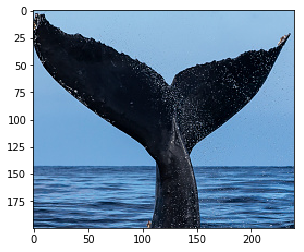

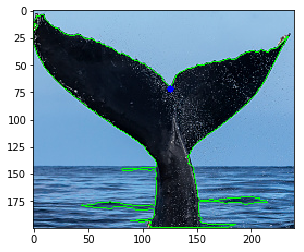

array([[[7, 5]],

       [[6, 6]],

       [[5, 6]],

       ..., 
       [[9, 6]],

       [[9, 5]],

       [[8, 5]]], dtype=int32)

In [8]:
img = cv2.imread('whale/images/G0010049.JPG')
img = img[130:330,40:280]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()
cx, cy = get_top(img)

img = cv2.circle(img,(cx,cy), 3, (255,0,0), -1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

cnt = findMaxContour(img)
cnt

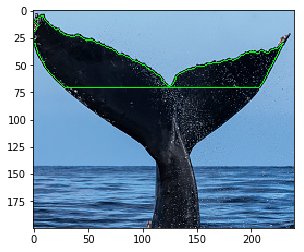

(<matplotlib.image.AxesImage at 0x25535354630>, None)

In [11]:
cnt = cnt[np.where(cnt[:,:,1]<cy)[0]] 
cnt

img = cv2.imread('whale/images/G0010049.JPG')
img = img[130:330,40:280]
cv2.drawContours(img, [cnt], 0, (0,255,0), 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()



In [91]:
img = cv2.imread('whale/images/G0010049.JPG')
img = img[130:330,40:280]
cv2.drawContours(img, [cnt], 0, (0,255,0), 1)

result = []
for row in cnt:
    x,y = row[0]
    
    hoge = cnt[np.where((cnt[:,:,0]==x)&(cnt[:,:,1]<y))]
    if hoge.size == 0:
        print(x,y)
        result.append(True)
    else:
        result.append(False)

7 5
6 6
5 6
4 7
3 8
2 9
1 10
0 20
230 30
229 30
228 31
227 32
226 33
225 34
224 35
223 35
222 35
221 36
220 36
219 36
218 37
217 38
216 39
215 39
214 39
213 38
212 38
211 37
210 37
209 37
208 38
207 39
206 39
205 39
204 38
203 38
202 38
201 38
200 38
199 38
198 39
197 39
196 39
195 39
194 40
193 41
192 41
191 41
190 42
189 43
188 44
187 44
186 45
185 45
184 46
183 46
182 45
181 45
180 45
179 45
178 46
177 46
176 46
175 46
174 47
173 47
172 48
171 48
170 48
169 48
168 48
167 48
166 48
165 48
164 49
163 49
162 49
161 49
160 49
159 50
158 50
157 51
156 51
155 51
154 51
153 51
152 51
151 51
150 51
149 52
148 53
147 53
146 53
145 54
144 54
143 54
142 54
141 55
140 55
139 56
138 56
137 57
136 57
135 58
134 58
133 59
132 60
131 61
130 64
129 66
128 68
127 69
126 69
125 70
124 69
123 69
122 68
121 67
120 66
119 65
118 62
117 61
116 60
115 60
114 59
113 59
112 58
111 57
110 56
109 55
108 55
107 54
106 54
105 53
104 52
103 51
102 50
101 50
100 50
99 49
98 49
97 48
96 47
95 47
94 47
93 46
92 46
9

In [93]:
cnt[result]

array([[[  7,   5]],

       [[  6,   6]],

       [[  5,   6]],

       [[  4,   7]],

       [[  3,   8]],

       [[  2,   9]],

       [[  1,  10]],

       [[  0,  20]],

       [[230,  30]],

       [[229,  30]],

       [[228,  31]],

       [[227,  32]],

       [[226,  33]],

       [[225,  34]],

       [[224,  35]],

       [[223,  35]],

       [[222,  35]],

       [[221,  36]],

       [[220,  36]],

       [[219,  36]],

       [[218,  37]],

       [[217,  38]],

       [[216,  39]],

       [[215,  39]],

       [[214,  39]],

       [[213,  38]],

       [[212,  38]],

       [[211,  37]],

       [[210,  37]],

       [[209,  37]],

       [[208,  38]],

       [[207,  39]],

       [[206,  39]],

       [[205,  39]],

       [[204,  38]],

       [[203,  38]],

       [[202,  38]],

       [[201,  38]],

       [[200,  38]],

       [[199,  38]],

       [[198,  39]],

       [[197,  39]],

       [[196,  39]],

       [[195,  39]],

       [[194,  40]],

       [[1

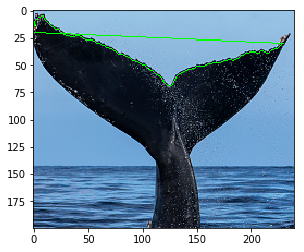

(<matplotlib.image.AxesImage at 0x2553516ccf8>, None)

In [96]:
img = cv2.imread('whale/images/G0010049.JPG')
img = img[130:330,40:280]
cv2.drawContours(img, [cnt[result]], 0, (0,255,0), 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

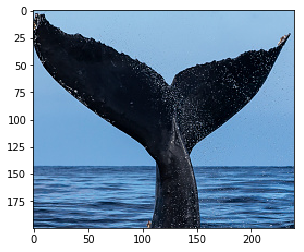

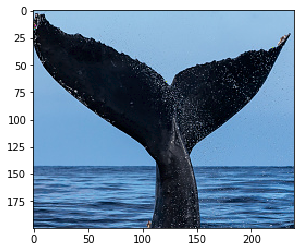

(<matplotlib.image.AxesImage at 0x255366c94a8>, None)

In [101]:
img = cv2.imread('whale/images/G0010049.JPG')
img = img[130:330,40:280]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

# img = img[result]
img = np.where((img == 255) | (img == 10), 0, img) #.astype(np.uint8)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.show()

# 指定したアスペクト比でトリミング

w > h:
- w を h の 2倍 に広げる

h > w:
- h を 1.3倍 に広げる
- w を h の 2倍 に広げる

h が 元の画像サイズを超えてる場合：
 余白を追加
w が 元の画像サイズを超えてる場合：
 余白を追加

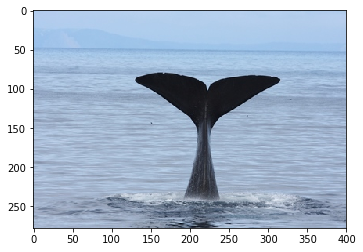

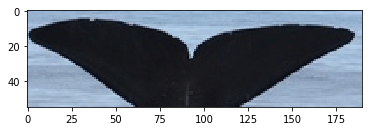

(<matplotlib.image.AxesImage at 0x1ea72cf5128>, None)

In [218]:
path = 'C:/Users/shihnkawa/prj/whale/images/G0010623.JPG'
img = cv2.imread(path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.show()
img_trim = img[75:130, 130:320]
plt.imshow(cv2.cvtColor(img_trim, cv2.COLOR_BGR2RGB)), plt.show()

In [231]:
def img_clip(img, rect):
    # 輪郭抽出しやすくなるように若干余白を加えてトリミングする
    padding = 10
    x1, y1, x2, y2 = rect
    x1_pad, y1_pad, x2_pad, y2_pad = x1-padding, y1-padding, x2+padding, y2+padding
    
    if x1_pad < 0:
        x1_pad = 0
    if y1_pad < 0:
        y1_pad = 0

    img_tmp = img[y1_pad:y2_pad, x1_pad:x2_pad]
    plt.imshow(cv2.cvtColor(img_tmp, cv2.COLOR_BGR2RGB)), plt.show()
    
    cnt = findMaxContour(img_tmp)
    x, y, w, h = cv2.boundingRect(cnt)
#     cv2.drawContours(img_tmp, cnt, -1, (0,255,0), 1)
#     plt.imshow(cv2.cvtColor(img_tmp, cv2.COLOR_BGR2RGB)), plt.show()

    h_resize = h
    w_resize = w
    
    if w > h:        
        w_resize = int(w * 1.3)
        h_resize = w_resize // 2
        
    else:
        h_resize = int(h * 1.3)
        w_resize = h_resize * 2
        
        
    # 幅、高さを広げた分、座標を修正
    left_pad = (w_resize - w) // 2
    top_pad = (h_resize - h) // 2    
    
    x1 -= left_pad
    y1 -= top_pad

    print(x1, y1, x1+w_resize, y1+h_resize)
#     img_clip = img[y1:y1+h_resize, x1:x1+w_resize]
    img_clip = img[y1:y1+h_resize, x1:x1+w_resize]

    print(img_clip.shape)
    plt.imshow(img_clip),plt.show()
    
    return 

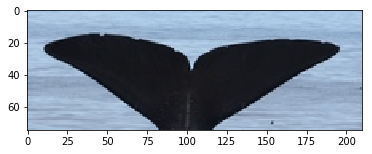

103 45
(120, 240, 3)


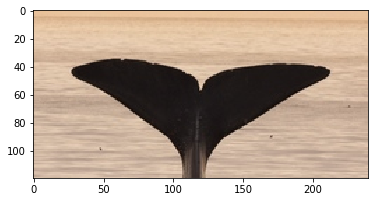

In [220]:
rect = 130, 75, 320, 130 #75:130, 130:320]
img_clip(img, rect)

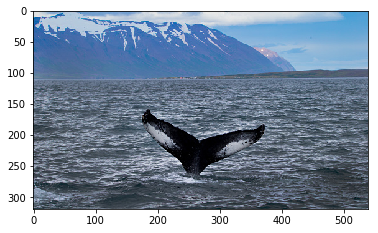

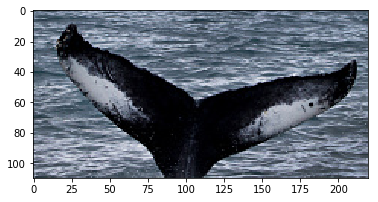

(<matplotlib.image.AxesImage at 0x1ea7287a400>, None)

In [221]:
path = "C:/Users/shihnkawa/prj/whale/images/G0010064.JPG"
img = cv2.imread(path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.show()
img_trim = img[150:260, 160:380]
plt.imshow(cv2.cvtColor(img_trim, cv2.COLOR_BGR2RGB)), plt.show()

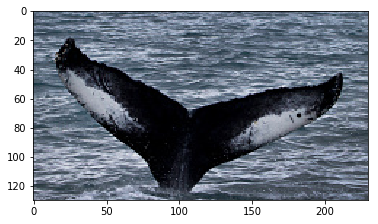

141 142
(128, 257, 3)


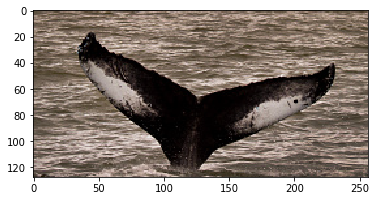

In [222]:
rect = 170, 150, 380, 260 #75:130, 130:320]
img_clip(img, rect)

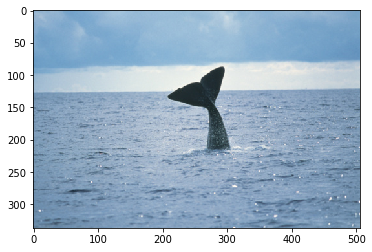

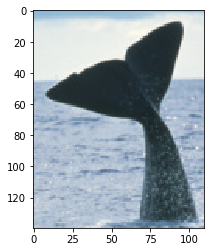

(<matplotlib.image.AxesImage at 0x1ea73fb7b38>, None)

In [223]:
path = 'C:/Users/shihnkawa/prj/whale/images/G0010818.JPG'
img = cv2.imread(path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.show()
img_trim = img[80:220, 200:310]
plt.imshow(cv2.cvtColor(img_trim, cv2.COLOR_BGR2RGB)), plt.show()

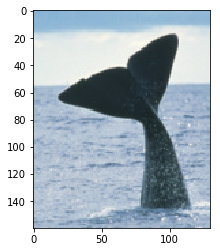

76 61
(172, 344, 3)


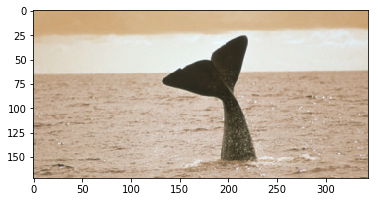

In [224]:
rect = 200, 80, 310, 220 #75:130, 130:320]80:220, 200:310
img_clip(img, rect)

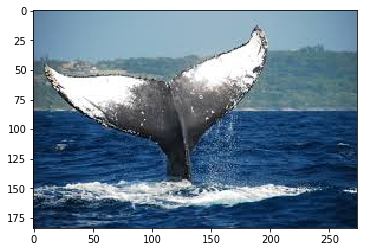

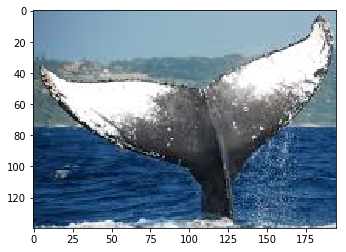

(<matplotlib.image.AxesImage at 0x1ea74134320>, None)

In [225]:
path = 'C:/Users/shihnkawa/prj/whale/images/images11.JPG'
img = cv2.imread(path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.show()
img_trim = img[10:150, 5:200]
plt.imshow(cv2.cvtColor(img_trim, cv2.COLOR_BGR2RGB)), plt.show()

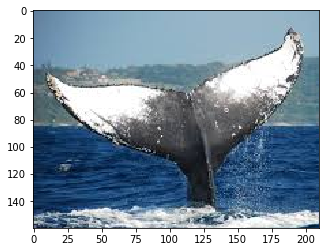

-26 6 247 142
(136, 0, 3)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


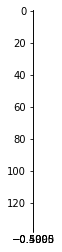

In [232]:
rect = 5, 10, 200, 150 #75:130, 130:320] 10:150, 5:200
img_clip(img, rect)